In [2]:
#Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Stat
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from scipy.stats import norm, skew #for some statistics

#Modeling

from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor

#Test
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

ModuleNotFoundError: No module named 'xgboost'

In [2]:
pwd

'C:\\Users\\seung\\Desktop\\Data\\Kaggle\\House Price'

In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
corr=df.corr()

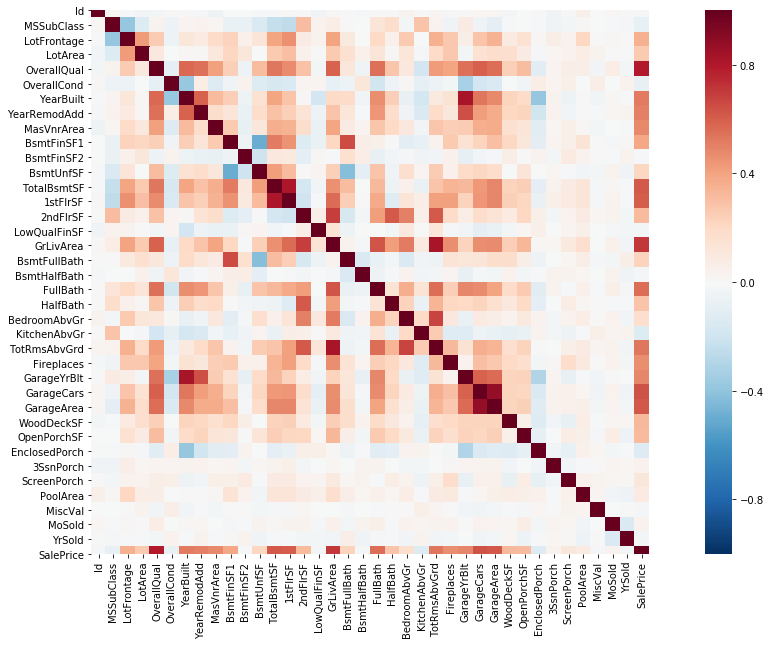

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap="RdBu_r",square=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# DATA PROCESSING

# Outlilers

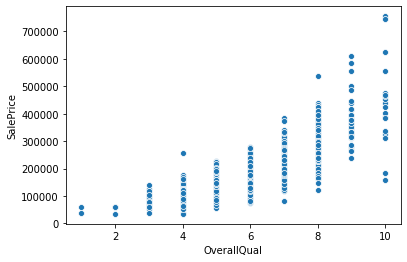

In [7]:
sns.scatterplot(x=df['OverallQual'],y=df['SalePrice'])

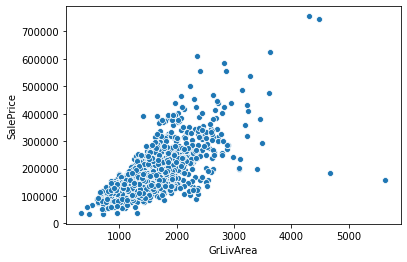

In [8]:
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'])

In [9]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

# Reponse Variable

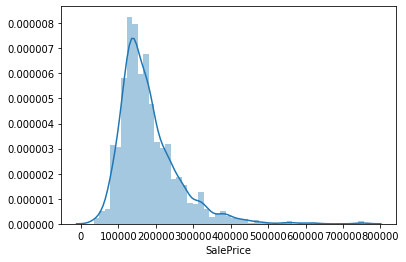

In [10]:
sns.distplot(df['SalePrice'])

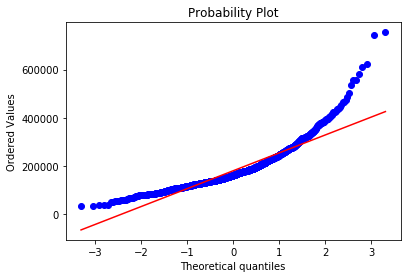

In [11]:
stats.probplot(df['SalePrice'],plot=plt)
plt.show()

In [12]:
df['SalePrice'],fitted_lambda = stats.boxcox(df['SalePrice'])

In [98]:
fitted_lambda

-0.07712954824421477

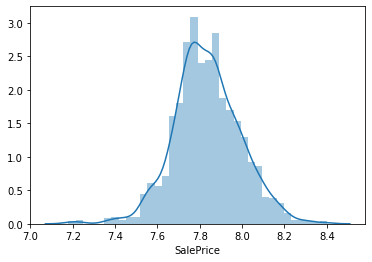

In [13]:
sns.distplot(df['SalePrice'])

# Feature Engineering

In [14]:
y = df['SalePrice'].reset_index(drop=True)
df_train = df.drop(['SalePrice'], axis=1)
df_test = test

In [15]:
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_all.shape

(2917, 80)

In [16]:
missing_data = df_all.isnull().sum().sort_values(ascending=False)
n=[ ]
for i in range(len(missing_data)):
    if missing_data[i]==0:
        n.append(i)

In [17]:
missing_data[0:min(n)]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [18]:
#'PoolQC'

In [19]:
df_all['PoolQC'] = df_all['PoolQC'].fillna("None")

In [20]:
#'MiscFeatures'

In [21]:
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")

In [22]:
#'Alley'

In [23]:
df_all["Alley"] = df_all["Alley"].fillna("None")

In [24]:
#'Fence'

In [25]:
df_all["Fence"] = df_all["Fence"].fillna("None")

In [26]:
#'FireplaceQu'

In [27]:
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")

In [28]:
#'LotFrontage'

In [29]:
df_all['LotFrontage']=df_all.groupby(by="Neighborhood")['LotFrontage'].transform (lambda x: x.fillna(x.median()))

In [30]:
#'GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual'

In [31]:
for x in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
    df_all[x] = df_all[x].fillna('None')

In [32]:
#'GarageYrBlt'

In [33]:
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)

In [34]:
#'BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1, BsmtCond'

In [35]:
for x in ('BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond'):
    df_all[x] = df_all[x].fillna('None')

In [36]:
#'MasVnrType','MasVnrArea'

In [37]:
df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

In [38]:
#"Electrical"

In [39]:
df_all["Electrical"]=df_all['Electrical'].fillna("SBrkr")

In [40]:
#MSZoning

In [41]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

In [42]:
#Functional

In [43]:
df_all["Functional"] = df_all["Functional"].fillna("Typ")

In [44]:
#Utilities

In [45]:
df_all = df_all.drop('Utilities', axis=1)

In [46]:
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'

In [47]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_all[col] = df_all[col].fillna(0)

In [48]:
#SaleType

In [49]:
df_all['SaleType']=df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [50]:
#'GarageArea', 'GarageCars'

In [51]:
for col in ('GarageArea', 'GarageCars'):
    df_all[col] = df_all[col].fillna(0)

In [52]:
#'Exterior1st','Exterior2nd'

In [53]:
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [54]:
#'KitchenQual'

In [55]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

# Check features of skewness

In [56]:
numeric_features = df_all.dtypes[df_all.dtypes != "object"].index

In [57]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [58]:
skewness = pd.DataFrame({'variable':numeric_features,'skew':skew(df_all[numeric_features])})
skewness.sort_values('skew',ascending=False).head(10) 

,variable,skew
34,MiscVal,21.939672
33,PoolArea,17.688664
3,LotArea,13.109495
15,LowQualFinSF,12.084539
31,3SsnPorch,11.372080
22,KitchenAbvGr,4.300550
10,BsmtFinSF2,4.144503
30,EnclosedPorch,4.002344
32,ScreenPorch,3.945101
18,BsmtHalfBath,3.929996


In [59]:
feature_skew = skewness[skewness['skew']>1].index
numeric_features[feature_skew]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [60]:
for x in numeric_features[feature_skew]:
    df_all[x]=np.log1p(df_all[x])

# Get Dummies

In [61]:
dummies = df_all.dtypes[df_all.dtypes=='object'].index
dummies

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [62]:
df_all = pd.get_dummies(df_all,drop_first=True)

# Create Train and Test data set

In [63]:
X = df_all.iloc[:len(y),:]
X_test = df_all.iloc[len(y):,:]

In [64]:
X.shape

(1458, 258)

In [65]:
X_test.shape

(1459, 258)

In [66]:
y.shape

(1458,)

# Modeling

In [67]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [68]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [69]:
#Ridge regression

In [70]:
ridge_alphas = [0.1, 1.0, 10.0, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

In [71]:
#SVM

In [72]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [108]:
#XGB

In [109]:
XGB = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

# Model Train

In [75]:
# Ridge regression

In [76]:
scores = {}
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.0443 (0.0070)


In [77]:
ridge_model = ridge.fit(X,y)

In [78]:
# SVM regression

In [79]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.0444 (0.0082)


In [80]:
svm_model = svr.fit(X,y)

In [81]:
# XGB

In [110]:
score = cv_rmse(XGB)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:06:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:07:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:08:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rf: 0.0467 (0.0072)


In [111]:
XGB_model = XGB.fit(X,y)

C:\Users\seung\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
# Blended Model

In [112]:
def Blended_Machine(X):
    return ((0.4 * ridge_model.predict(X)) +(0.3 * svm_model.predict(X)) + (0.3 * XGB_model.predict(X))) 

In [113]:
blended_score = rmsle(y, Blended_Machine(X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.03102352584222167


# Submit

In [114]:
log_prediction = Blended_Machine(X_test)

In [115]:
print(log_prediction.shape)

(1459,)


In [116]:
prediction = inv_boxcox(log_prediction, -0.07712954824421477)

In [117]:
submission = pd.DataFrame()

In [118]:
submission['Id']=X_test['Id']

In [119]:
submission['SalePrice'] = prediction

In [120]:
prediction

array([119738.8515936 , 157577.941399  , 186154.24326523, ...,
       168240.82022395, 111737.15509935, 219408.23199839])

In [121]:
submission.to_csv('submit1.csv',index=False)